<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Aios24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [85]:
# Trains a model to classify images of 3 classes: dr1, dr2, and dr3
# Defines & compiles the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
    ])

In [86]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

# Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#splits data into training and testing(validation) sets
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)

import matplotlib.pyplot as plt


In [87]:
#training data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/DR image data set/training set',  # Source directory
        target_size=(150, 150),  # Resizes images
        batch_size=15,
        class_mode='categorical',
        subset = 'training')

#Testing data
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DR image data set/validation set',
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 81 images belonging to 3 classes.
Found 8 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1
)

# plotting the model metrics

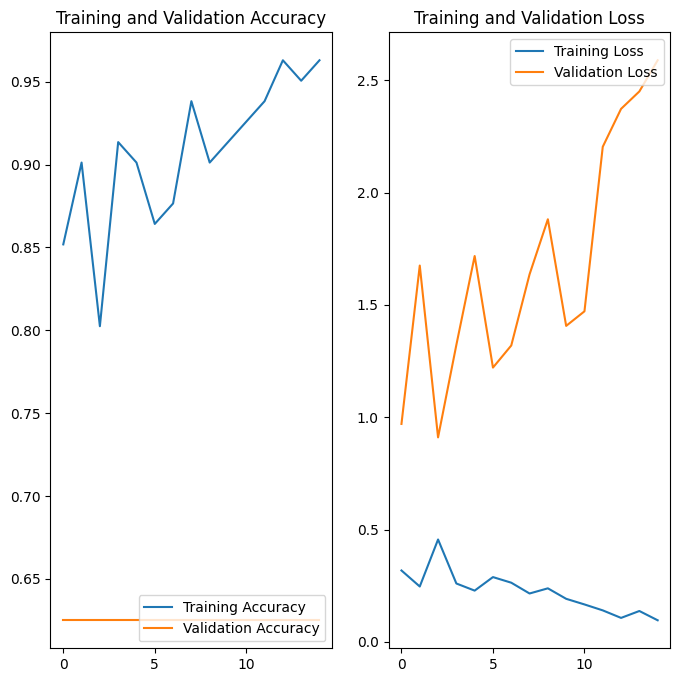

Training Accuracy:
0.9629629850387573
Testing Accuracy:
0.625


(None, None)

In [88]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

#This code is used to plot the training and validation accuracy

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Training Accuracy:"), print(history.history['acc'][-1])
print("Testing Accuracy:"), print (history.history['val_acc'][-1])

In [89]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")
# Label Mappings for classes present in the training and validation datasets



Label Mappings for classes present in the training and validation datasets

0 : dr1_train
1 : dr2_train
2 : dr3_train


# plotting sample training images

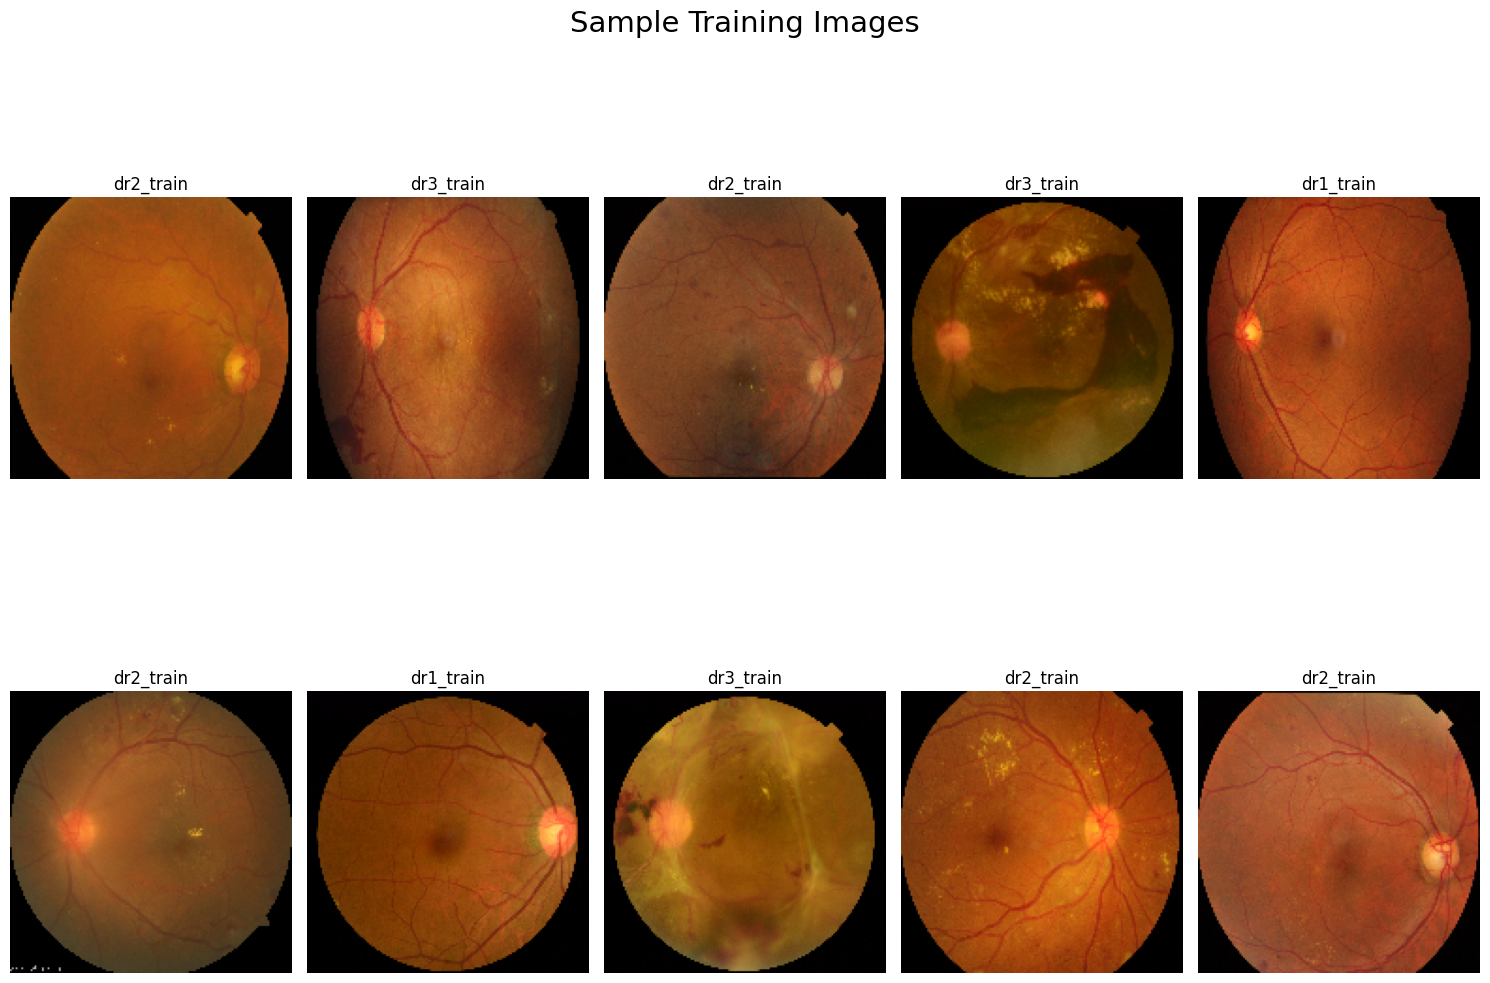

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

# testing the model on test set

In [91]:
test_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DR image data set/validation set',
    shuffle=False,
    batch_size=5,
    target_size = (150, 150),
    class_mode='categorical')


Found 37 images belonging to 3 classes.


# model prediction on the test dataset

In [92]:
predictions = model.predict(test_generator)

8/8 [==============================] - 2s 272ms/step


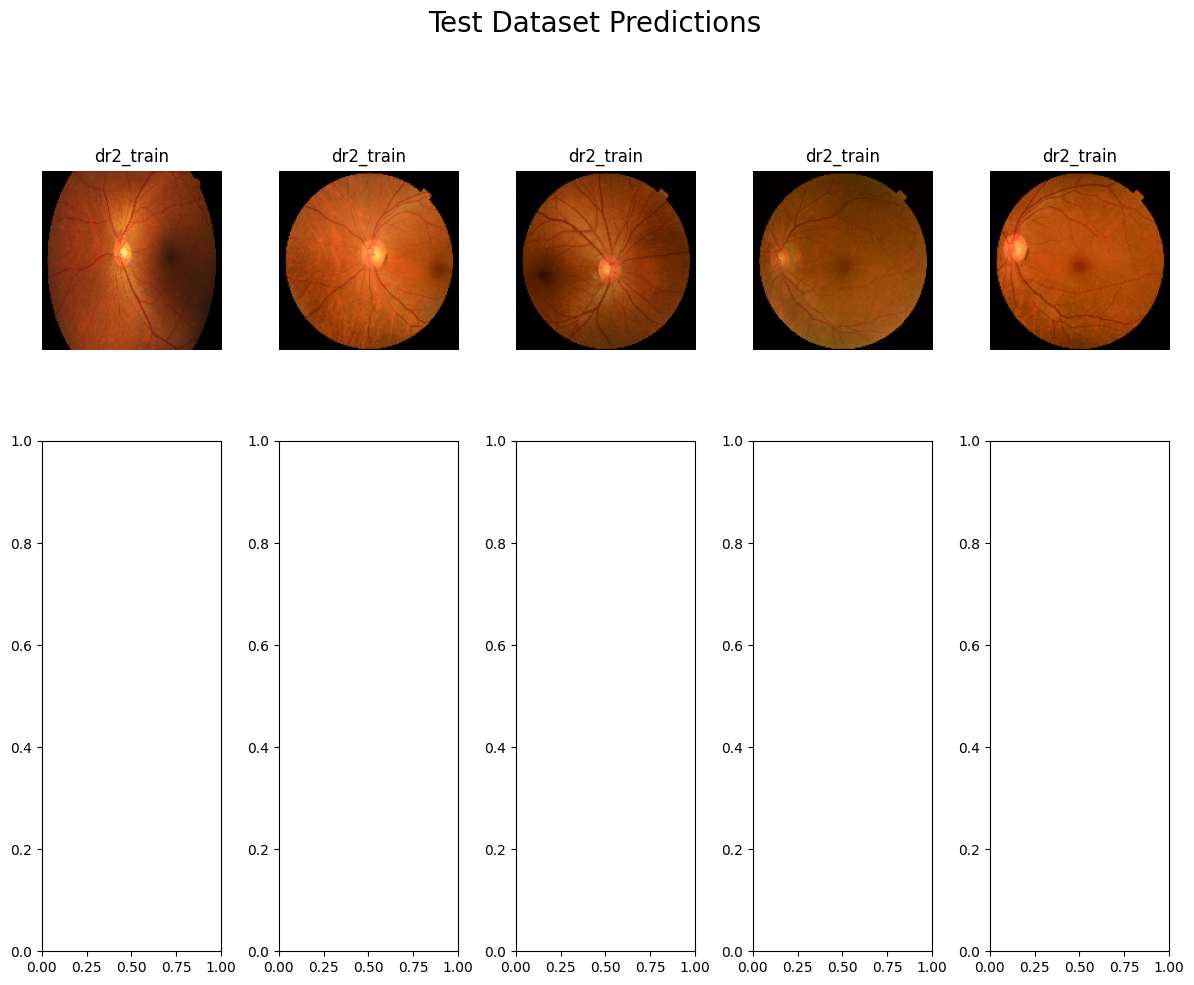

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(1):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [71]:
test_loss, test_accuracy = model.evaluate(test_generator,
                          batch_size=5)


8/8 [==============================] - 2s 247ms/step - loss: 0.7562 - acc: 0.8649


In [72]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.756205677986145
Test Accuracy: 0.8648648858070374


# plotting the classification report
# confusion matrix

In [73]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

<Axes: >

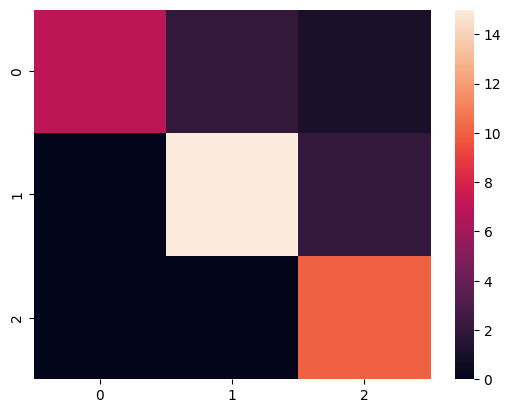

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

cf_mtx = confusion_matrix(y_true, y_pred)


import seaborn as sns
sns.heatmap(cf_mtx)

In [78]:
print(classification_report(y_true, y_pred, target_names=labels.values()))




              precision    recall  f1-score   support

   dr1_train       1.00      0.70      0.82        10
   dr2_train       0.88      0.88      0.88        17
   dr3_train       0.77      1.00      0.87        10

    accuracy                           0.86        37
   macro avg       0.88      0.86      0.86        37
weighted avg       0.88      0.86      0.86        37

